# Airline Passenger Satisfaction – Final Project

This project explores a dataset of airline passengers to predict customer satisfaction based on flight service quality and demographics.

In this notebook:
- We start with data loading and basic exploration
- Perform EDA to understand key drivers of satisfaction
- Train and evaluate classification models


In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set display and visualization options
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load dataset
df = pd.read_csv('/kaggle/input/airline-passenger-satisfaction/train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# Check missing values for each column

In [2]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Display both missing values and their percentage
missing_report = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

missing_report

,Missing Values,Missing Percentage (%)
Arrival Delay in Minutes,310,0.298352
Unnamed: 0,0,0.000000
Online boarding,0,0.000000
Departure Delay in Minutes,0,0.000000
Cleanliness,0,0.000000
Inflight service,0,0.000000
Checkin service,0,0.000000
Baggage handling,0,0.000000
Leg room service,0,0.000000
On-board service,0,0.000000


# Find numeric columns

In [3]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns


Index(['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

# Outlier detection using IQR method

In [4]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Outlier summary for all numeric columns
for column in numeric_columns:
    outliers = detect_outliers(df, column)
    print(f"{column}: {len(outliers)} outliers")


Unnamed: 0: 0 outliers
id: 0 outliers
Age: 0 outliers
Flight Distance: 2291 outliers
Inflight wifi service: 0 outliers
Departure/Arrival time convenient: 0 outliers
Ease of Online booking: 0 outliers
Gate location: 0 outliers
Food and drink: 0 outliers
Online boarding: 0 outliers
Seat comfort: 0 outliers
Inflight entertainment: 0 outliers
On-board service: 0 outliers
Leg room service: 0 outliers
Baggage handling: 0 outliers
Checkin service: 12891 outliers
Inflight service: 0 outliers
Cleanliness: 0 outliers
Departure Delay in Minutes: 14529 outliers
Arrival Delay in Minutes: 13954 outliers


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


## Outlier Visualization

In this step, we visualize the distribution of selected numerical variables to observe the detected outliers. Boxplots are used for a better understanding of the spread and extreme values in the data.


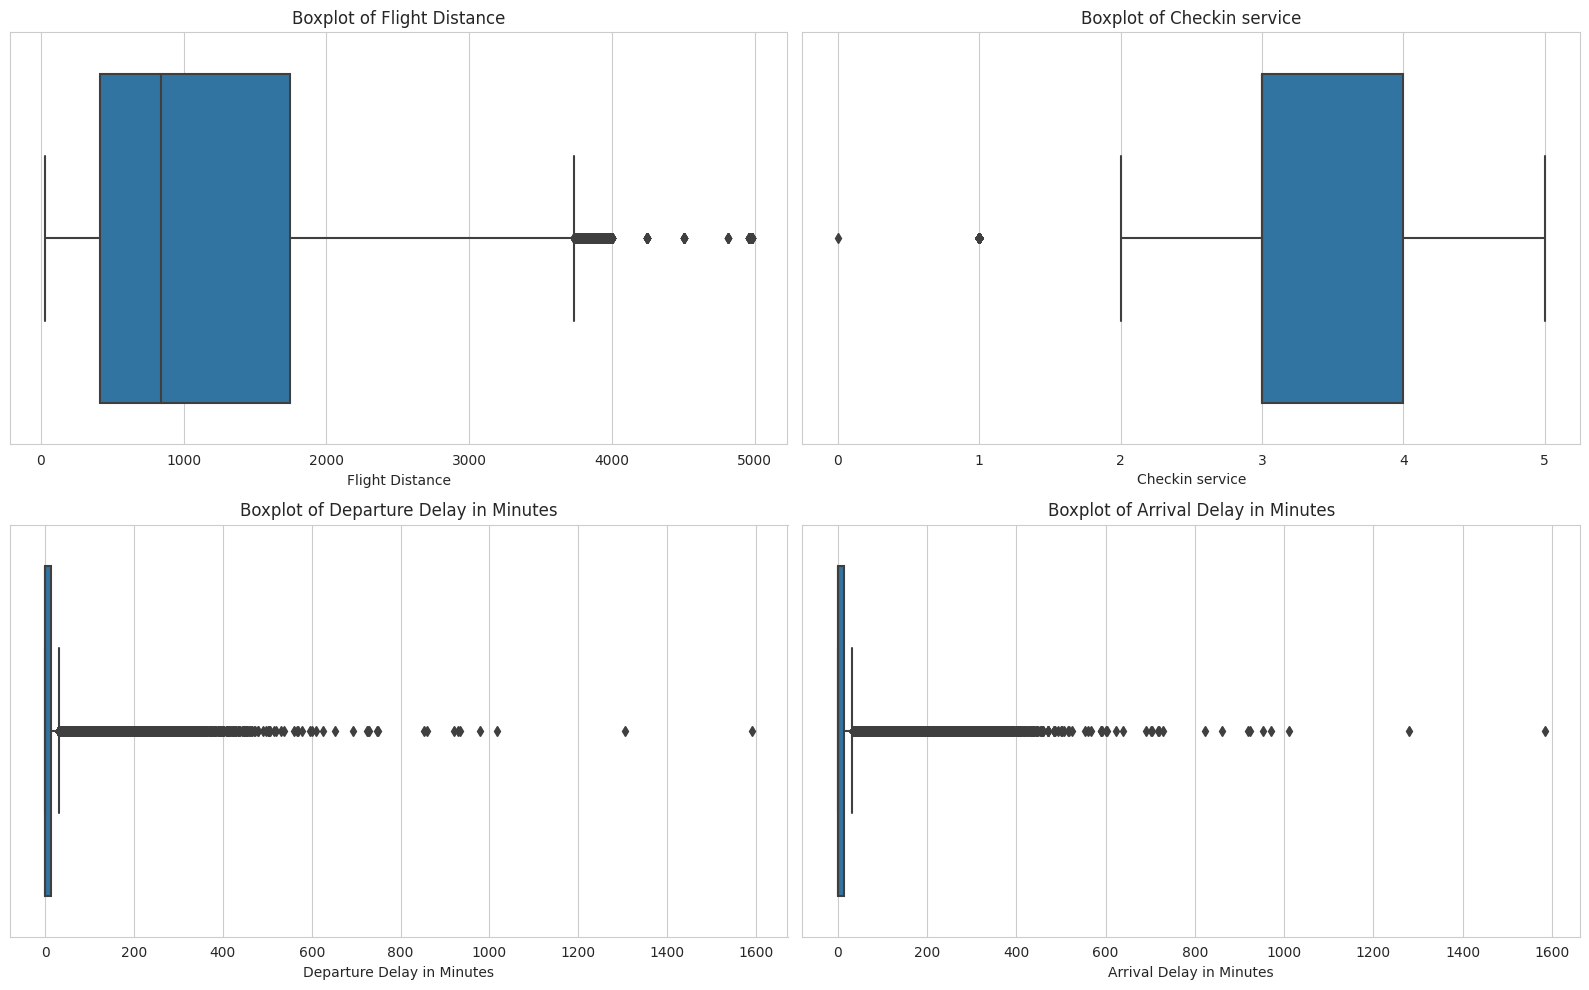

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
plt.figure(figsize=(16, 10))

# Boxplots for selected numeric columns
selected_columns = ['Flight Distance', 'Checkin service', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


## General Data Visualization

In this step, we explore and visualize the distribution of key numerical and categorical variables to better understand the dataset.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

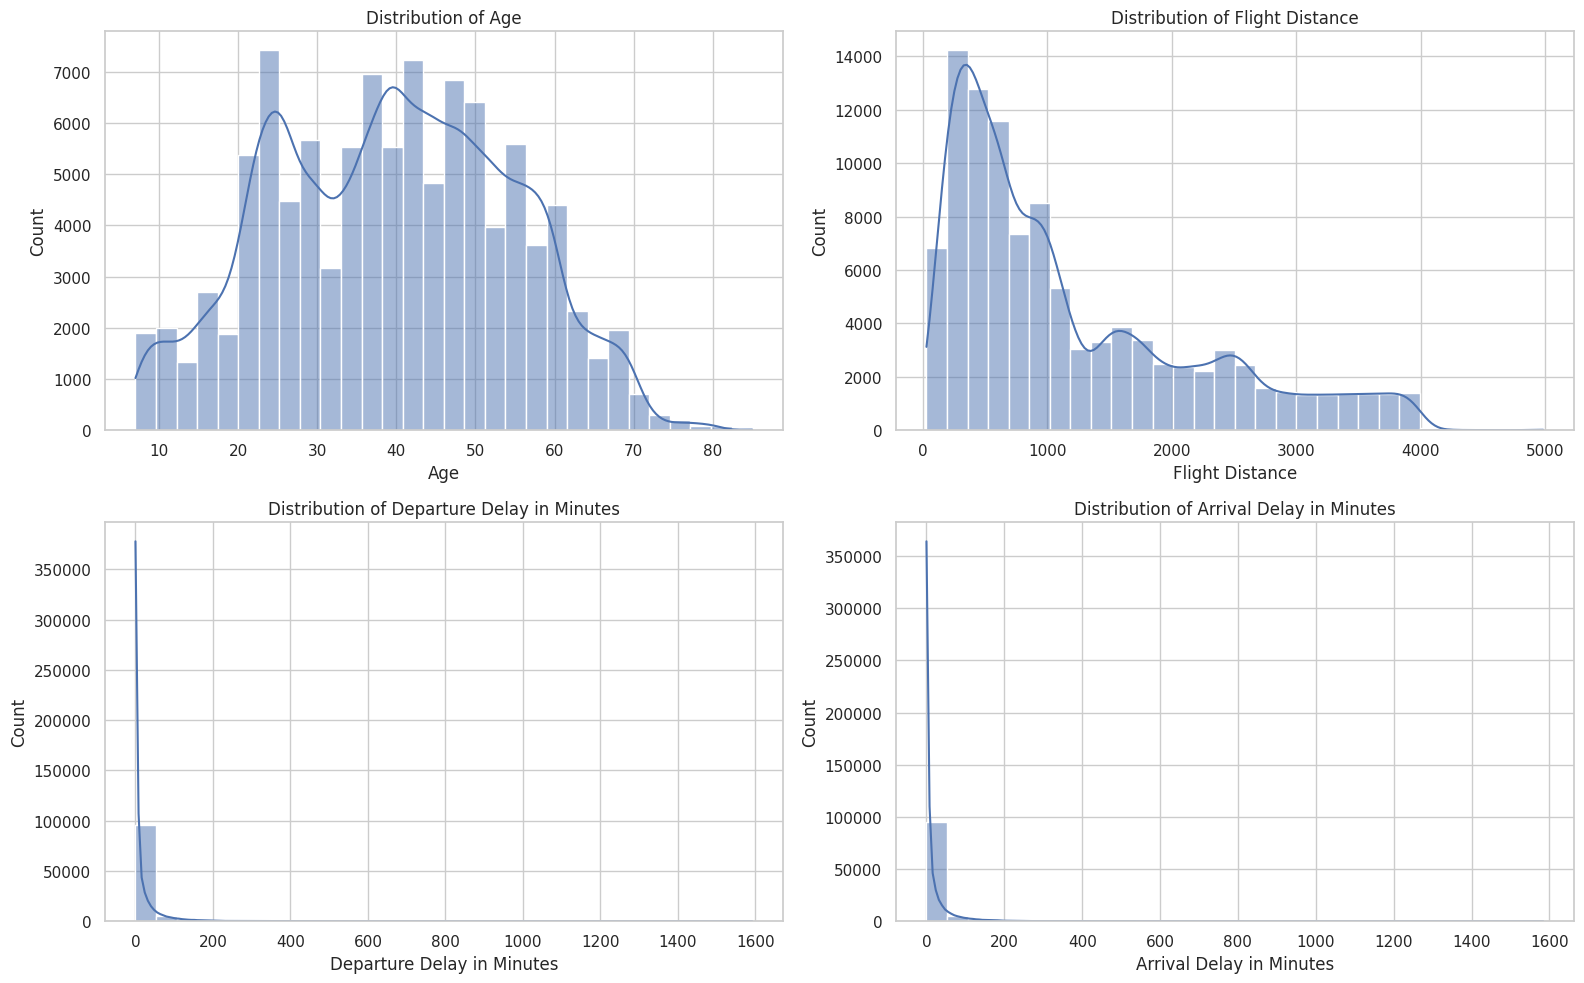

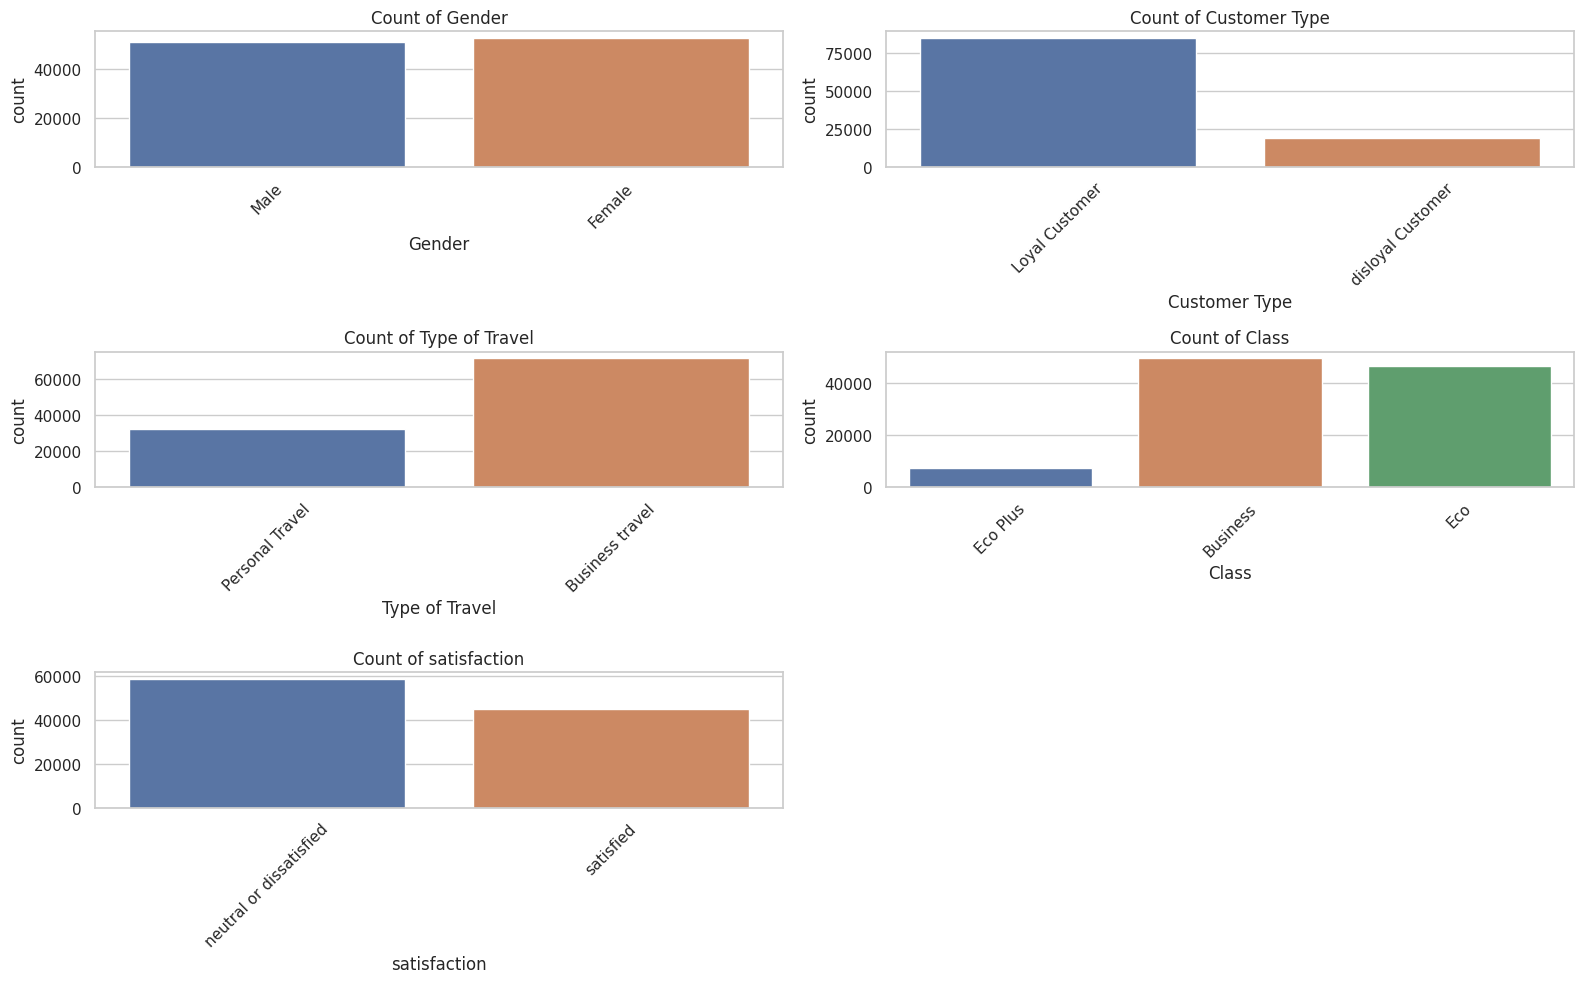

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set general style
sns.set(style="whitegrid")

# Numerical columns to visualize
numeric_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Plot numerical features
plt.figure(figsize=(16, 10))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Categorical columns to visualize
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

# Plot categorical features
plt.figure(figsize=(16, 10))
for i, column in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=df[column])
    plt.title(f'Count of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Descriptive Statistics
In this step, we generate the basic statistical summary of the dataset.


In [7]:
# Generate descriptive statistics
desc_stats = df.describe()
desc_stats


,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## Missing Values Handling
In this step, we handle the missing values by filling them with the median value.


In [8]:
# Fill missing values in 'Arrival Delay in Minutes' with the median
median_value = df['Arrival Delay in Minutes'].median()
df['Arrival Delay in Minutes'].fillna(median_value, inplace=True)

# Check again if any missing values remain
df.isnull().sum()


/tmp/ipykernel_35/876456833.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay in Minutes'].fillna(median_value, inplace=True)


Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## Correlation Analysis
In this step, we analyze the correlations between the numerical variables.


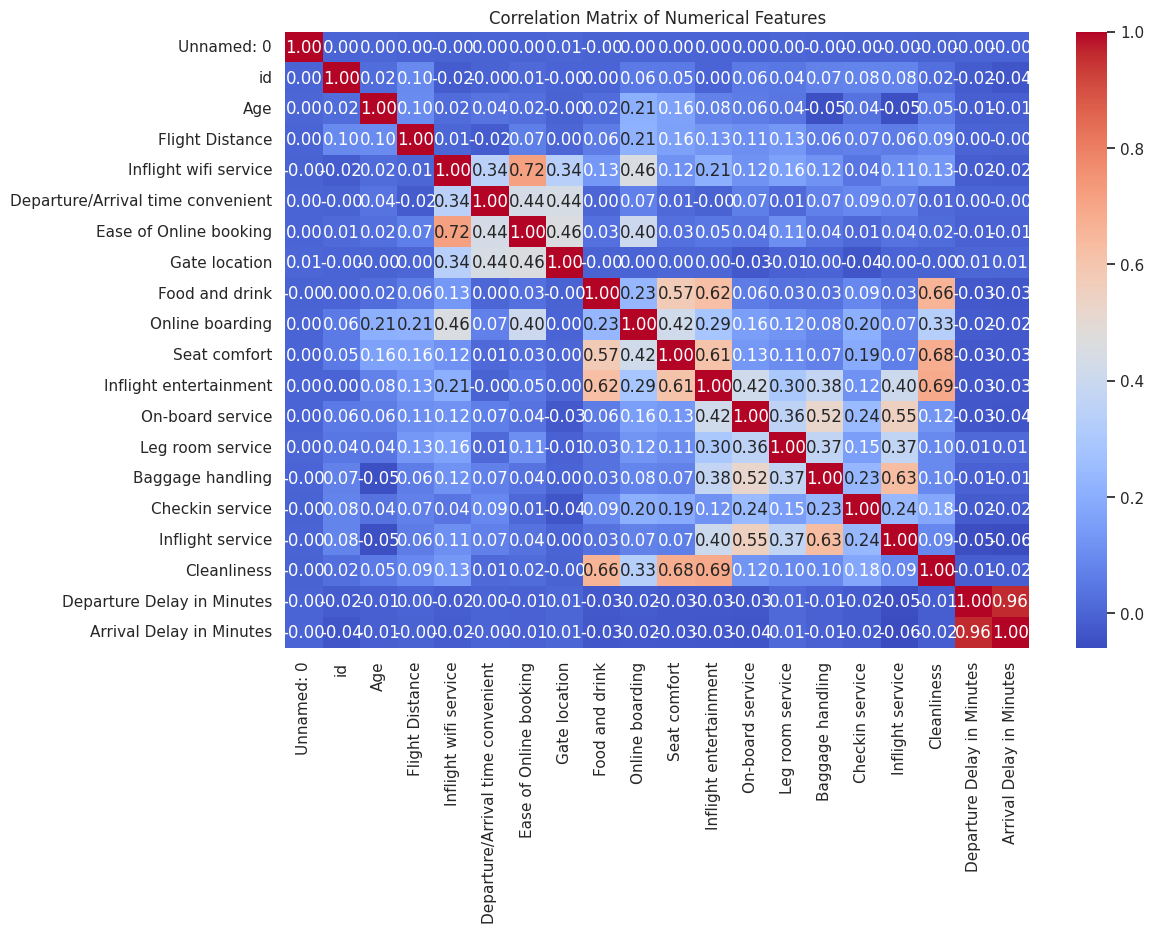

In [9]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


## Final Feature Cleaning
In this step, we finalize feature cleaning and remove irrelevant columns.


In [10]:
# Drop irrelevant columns
columns_to_drop = ['Unnamed: 0', 'id']
df_cleaned = df.drop(columns=columns_to_drop)

# Check final columns
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

# Conclusion and Summary Report


In this analysis, we aimed to explore the key factors that influence airline passenger satisfaction by applying a complete data analysis pipeline.
We started with exploratory data analysis, missing value treatment, outlier detection, and visualization of both numerical and categorical features.
After data preprocessing, a Logistic Regression model was applied to predict customer satisfaction.
The model achieved an accuracy of 63% on the test data.
While the model performs reasonably on identifying dissatisfied passengers, its performance on satisfied customers is relatively lower, indicating some class imbalance or feature limitations.
Further improvements may involve feature engineering, trying more complex models (such as Random Forest or XGBoost), and performing hyperparameter tuning to improve predictive performance.
Overall, this project helped in understanding the data structure, key influencing factors, and the challenges in customer satisfaction prediction tasks.

In [11]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_enc = LabelEncoder()
df['Gender'] = label_enc.fit_transform(df['Gender'])
df['Customer Type'] = label_enc.fit_transform(df['Customer Type'])
df['Type of Travel'] = label_enc.fit_transform(df['Type of Travel'])
df['Class'] = label_enc.fit_transform(df['Class'])
df['satisfaction'] = label_enc.fit_transform(df['satisfaction'])

# Define features and target
X = df.drop(['satisfaction'], axis=1)
y = df['satisfaction']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.6321639959578461
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.77      0.70     11713
           1       0.60      0.45      0.52      9068

    accuracy                           0.63     20781
   macro avg       0.63      0.61      0.61     20781
weighted avg       0.63      0.63      0.62     20781

